In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import pi, inf
from scipy.special import jv 
from itertools import product
from scipy import real
from operator import itemgetter

def cquad(func, a, b, **kwargs):
    def real_func(x, *args):
        return np.real(func(x, *args))
    def imag_func(x, *args):
        return np.imag(func(x, *args))
    real_integral = quad(real_func, a, b, **kwargs)
    imag_integral = quad(imag_func, a, b, **kwargs)
    return (real_integral[0] + 1j*imag_integral[0], 'Hey Boi')

In [2]:
# Parameters
TI_emu = (3,1)

data1 = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1, "e2" : 1, "n1" : 1, "theta1" : 0, "theta2" : pi,  'w' : 1}
data1['w'] = data1['c']*2*pi/(600*10**(-9))
data1["m2"] = TI_emu[1]
data1["e2"] = TI_emu[0]
data1["delta"] = data1["alpha"]*data1["m1"]*data1["m2"]*(data1["theta2"] - data1["theta1"])/pi
data1["k1"] = data1["n1"]*data1["w"]/data1["c"]
data1["n2"] = np.sqrt(data1['e2']*data1['m2'])
data1["k2"] = data1["n2"]*data1["w"]/data1["c"]

# 3-Layers Air/TI/Mu
dataMu2 = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1, "n1" : 1, "theta1" : 0, "theta2" : pi, "theta3": 0,  "w" : 1, 'm0' : 4*pi*10**(-7)}
dataMu2['w'] = dataMu2['c']*2*pi/(600*10**(-9))
dataMu2["e2"] = TI_emu[0]
dataMu2["m2"] = TI_emu[1]
dataMu2["n2"] = np.sqrt(dataMu2["m2"]*dataMu2["e2"])
dataMu2["e3"] = 1
dataMu2["m3"] = 10**5
dataMu2["n3"] = 10**(5/2)
dataMu2["k1"] = dataMu2["n1"]*dataMu2["w"]/dataMu2["c"]
dataMu2["k2"] = dataMu2["n2"]*dataMu2["w"]/dataMu2["c"]
dataMu2["k3"] = dataMu2["n3"]*dataMu2["w"]/dataMu2["c"]
dataMu2["delta"] = dataMu2["alpha"]*dataMu2["m1"]*dataMu2["m2"]*(dataMu2["theta1"] - dataMu2["theta2"])/pi
dataMu2["scale"] = 1
dataMu2["dist12"] = 100*10**(-9) #esto esta a escala 600nm (son 100nm - visto de un paper en donde trbajaban con thin films de 1000 Amstrong)
dataMu2["dist23"] = 0

# 3-Layers Air/Mu/TI
dataMu3 = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1, "n1" : 1, "theta1" : 0, "theta2" : 0, "theta3": pi,  "w" : 1, 'm0' : 4*pi*10**(-7)}
dataMu3['w'] = dataMu3['c']*2*pi/(600*10**(-9))
dataMu3["e3"] = TI_emu[0]
dataMu3["m3"] = TI_emu[1]
dataMu3["n3"] = np.sqrt(dataMu3["m3"]*dataMu3["e3"])
dataMu3["e2"] = 1
dataMu3["m2"] = 10**5
dataMu3["n2"] = 10**(5/2)
dataMu3["k1"] = dataMu3["n1"]*dataMu3["w"]/dataMu3["c"]
dataMu3["k2"] = dataMu3["n2"]*dataMu3["w"]/dataMu3["c"]
dataMu3["k3"] = dataMu3["n3"]*dataMu3["w"]/dataMu3["c"]
dataMu3["delta"] = dataMu3["alpha"]*dataMu3["m1"]*dataMu3["m2"]*(dataMu3["theta1"] - dataMu3["theta2"])/pi
dataMu3["scale"] = 1
dataMu3["dist12"] = 100*10**(-9) #esto esta a escala 600nm (son 100nm - visto de un paper en donde trbajaban con thin films de 1000 Amstrong)
dataMu3["dist23"] = 0

#STRENGTH_FACTOR 
SF = ((0.6)**2)*(10**(-12))

In [35]:
# Fresnel Coeff 2-Layers 
def Rtmtm(kp, data=data1, display=False): 
    e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w = data['e1'], data['e2'], data['k1'], data['k2'], data['m1'], data['m2'], data['n1'], data['n2'], data['delta'], data['c'], data['w']
    thingy = ( (e2*np.sqrt(k1**2-kp**2)-e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)/( (e2*np.sqrt(k1**2-kp**2) + e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    if display: return np.abs(thingy)**2
    return thingy

def Rtetm(kp, data=data1, display=False): 
    e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w = data['e1'], data['e2'], data['k1'], data['k2'], data['m1'], data['m2'], data['n1'], data['n2'], data['delta'], data['c'], data['w']
    thingy = -2*m2*n1*np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta/( (e2*np.sqrt(k1**2-kp**2) + e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    if display: return np.abs(thingy)**2
    return thingy

def Rtete(kp, data=data1, display=False): 
    e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w = data['e1'], data['e2'], data['k1'], data['k2'], data['m1'], data['m2'], data['n1'], data['n2'], data['delta'], data['c'], data['w']
    thingy = ( (m2*np.sqrt(k1**2-kp**2)-m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    if display: return np.abs(thingy)**2
    return thingy

def Rtmte(kp, data=data1, display=False): 
    e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w = data['e1'], data['e2'], data['k1'], data['k2'], data['m1'], data['m2'], data['n1'], data['n2'], data['delta'], data['c'], data['w']
    thingy = -2*m2*n1*np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    if display: return np.abs(thingy)**2
    return thingy

def Ttmtm(kp, data=data1, display=False): 
    e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w = data['e1'], data['e2'], data['k1'], data['k2'], data['m1'], data['m2'], data['n1'], data['n2'], data['delta'], data['c'], data['w']
    thingy = n2/n1 * (2*e1*np.sqrt(k1**2-kp**2))*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2)))/ ( (e2*np.sqrt(k1**2-kp**2) + e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    if display: return (((np.sqrt(k2**2-kp**2))/(np.sqrt(k1**2-kp**2)))*(m1/m2))*np.abs(thingy)**2
    return thingy

def Ttetm(kp, data=data1, display=False): 
    e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w = data['e1'], data['e2'], data['k1'], data['k2'], data['m1'], data['m2'], data['n1'], data['n2'], data['delta'], data['c'], data['w']
    thingy = -2*m2*n1*np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    if display: return (((np.sqrt(k2**2-kp**2))/(np.sqrt(k1**2-kp**2)))*(m1/m2))*np.abs(thingy)**2
    return thingy

def Ttmte(kp, data=data1, display=False): 
    e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w = data['e1'], data['e2'], data['k1'], data['k2'], data['m1'], data['m2'], data['n1'], data['n2'], data['delta'], data['c'], data['w']
    thingy = 2*m2*n2*np.sqrt(k1**2-kp**2)**2*delta/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    if display: return (((np.sqrt(k2**2-kp**2))/(np.sqrt(k1**2-kp**2)))*(m1/m2))*np.abs(thingy)**2
    return thingy

def Ttete(kp, data=data1, display=False): 
    e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w = data['e1'], data['e2'], data['k1'], data['k2'], data['m1'], data['m2'], data['n1'], data['n2'], data['delta'], data['c'], data['w']
    thingy = 2*m2*np.sqrt(k1**2-kp**2)*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2)))/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    if display: return (((np.sqrt(k2**2-kp**2))/(np.sqrt(k1**2-kp**2)))*(m1/m2))*np.abs(thingy)**2
    return thingy

rtmtm = np.vectorize(Rtmtm)
rtetm = np.vectorize(Rtetm)
rtmte = np.vectorize(Rtmte)
rtete = np.vectorize(Rtete)
ttmtm = np.vectorize(Ttmtm)
ttetm = np.vectorize(Ttetm)
ttmte = np.vectorize(Ttmte)
ttete = np.vectorize(Ttete)

In [36]:
# Fresnel Coeff 3-Layers 
def ReflectiveMatrix(kp, data=data1):
    return np.array([[Rtete(kp, data=data), Rtetm(kp, data=data)], [Rtmte(kp, data=data), Rtmtm(kp, data=data)]])

def TransmisiveMatrix(kp, data=data1):
    return np.array([[Ttete(kp, data=data), Ttetm(kp, data=data)], [Ttmte(kp, data=data), Ttmtm(kp, data=data)]])

def VelocityMatrix(kp, data=data1):
    k1,k2,k3,n1,n2,n3,e1,e2,e3,m1,m2,m3,alpha,theta1,theta2,theta3,dist12,dist23 = itemgetter('k1','k2','k3','n1','n2','n3','e1','e2','e3','m1','m2','m3','alpha','theta1','theta2','theta3','dist12','dist23')(data)
    delta21 =  alpha*m2*m1*(theta1 - theta2)/pi
    delta23 =  alpha*m2*m3*(theta3 - theta2)/pi
    data21 = data.copy()
    data21.update({'e1':e2, 'e2':e1, 'k1':k2, 'k2':k1, 'm1':m2, 'm2':m1, 'n1':n2, 'n2':n1, 'delta':delta21})
    data23 = data.copy()
    data23.update({'e1':e2, 'e2':e3, 'k1':k2, 'k2':k3, 'm1':m2, 'm2':m3, 'n1':n2, 'n2':n3, 'delta':delta23})
    r21 = ReflectiveMatrix(kp, data21)
    r23 = ReflectiveMatrix(kp, data23)
    return np.array([[1,0],[0,1]]) - np.e**(2j*np.sqrt(k2**2-kp**2)*(dist12-dist23))*(r21.dot(r23))

def ThreeLayerReflexive(kp, data=data1):
    k1,k2,k3,n1,n2,n3,e1,e2,e3,m1,m2,m3,alpha,theta1,theta2,theta3,dist12,dist23 = itemgetter('k1','k2','k3','n1','n2','n3','e1','e2','e3','m1','m2','m3','alpha','theta1','theta2','theta3','dist12','dist23')(data)
    delta21 =  alpha*m2*m1*(theta1 - theta2)/pi
    delta23 =  alpha*m2*m3*(theta3 - theta2)/pi
    delta12 =  alpha*m1*m2*(theta2 - theta1)/pi
    data12 = data.copy()
    data12.update({'e1':e1, 'e2':e2, 'k1':k1, 'k2':k2, 'm1':m1, 'm2':m2, 'n1':n1, 'n2':n2, 'delta':delta12})
    data23 = data.copy()
    data23.update({'e1':e2, 'e2':e3, 'k1':k2, 'k2':k3, 'm1':m2, 'm2':m3, 'n1':n2, 'n2':n3, 'delta':delta23})
    data21 = data.copy()
    data21.update({'e1':e2, 'e2':e1, 'k1':k2, 'k2':k1, 'm1':m2, 'm2':m1, 'n1':n2, 'n2':n1, 'delta':delta21})

    r12 = ReflectiveMatrix(kp, data12)
    t21 = TransmisiveMatrix(kp, data21)
    r23 = ReflectiveMatrix(kp, data23)
    M = np.linalg.inv(VelocityMatrix(kp, data))
    t12 = TransmisiveMatrix(kp, data12)
    M2 = t21.dot(r23).dot(M).dot(t12)
    return  r12 + np.e**(-2j*np.sqrt(k2**2-kp**2)*(dist23-dist12))*M2


def RteteMU(kp, data=dataMu2, display=False):
    thingy = ThreeLayerReflexive(kp, data)[0,0]
    if display: return np.abs(thingy)**2
    return thingy

def RtetmMU(kp, data=dataMu2, display=False):
    thingy = ThreeLayerReflexive(kp, data)[0,1]
    if display: return np.abs(thingy)**2
    return thingy

def RtmtmMU(kp, data=dataMu2, display=False):
    thingy = ThreeLayerReflexive(kp, data)[1,1]
    if display: return np.abs(thingy)**2
    return thingy

def RtmteMU(kp, data=dataMu2, display=False):
    thingy = ThreeLayerReflexive(kp, data)[1,0]
    if display: return np.abs(thingy)**2
    return thingy

rtmtmMU = np.vectorize(RtmtmMU)
rtetmMU = np.vectorize(RtetmMU)
rtmteMU = np.vectorize(RtmteMU)
rteteMU = np.vectorize(RteteMU)

In [37]:
theta_i = np.arange(0,pi/2, 0.001)
kps = data1['k1']*np.sin(theta_i)
rtmtm_points = rtmtm(kps, data1, display=True)
rtete_points = rtete(kps, data1, display=True)
ttmtm_points = ttmtm(kps, data1, display=True)
ttete_points = ttete(kps, data1, display=True)

rtmte_points = rtmte(kps, data1, display=True)
rtetm_points = rtetm(kps, data1, display=True)
ttmte_points = ttmte(kps, data1, display=True)
ttetm_points = ttetm(kps, data1, display=True)

rtmte_points_test = rtmte(kps, data1)
rtetm_points_test = rtetm(kps, data1)
rtmte_points_test == rtetm_points_test


array([ True,  True,  True, ...,  True,  True,  True])

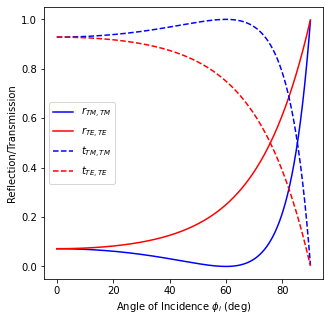

Text(0.5, 0, 'Angle of Incidence $\\phi_i$ (deg)')

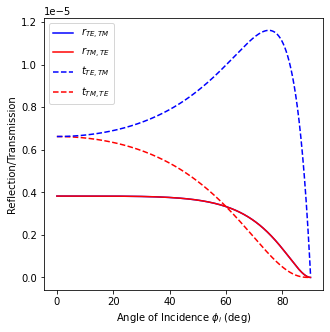

In [38]:
#Control Graphs 
fig, ax = plt.subplots(figsize=(5,5))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax_rtmtm, = ax.plot(theta_i*180/pi, rtmtm_points, color= 'blue', label=r'$r_{{TM,TM}}$') 
ax_rtete, = ax.plot(theta_i*180/pi, rtete_points, color= 'red', label=r'$r_{{TE,TE}}$')
ax_ttmtm, = ax.plot(theta_i*180/pi, ttmtm_points, color= 'blue', linestyle='--', label=r'$t_{{TM,TM}}$') 
ax_ttete, = ax.plot(theta_i*180/pi, ttete_points, color= 'red', linestyle='--', label=r'$t_{{TE,TE}}$')

ax.legend(handles=[ax_rtmtm, ax_rtete, ax_ttmtm, ax_ttete], prop={'size': 10})
ax.set_ylabel(r'Reflection/Transmission')
ax.set_xlabel(r'Angle of Incidence $\phi_i$ (deg)')
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax_rtmtm, = ax.plot(theta_i*180/pi, rtetm_points, color= 'blue', label=r'$r_{{TE,TM}}$') 
ax_rtete, = ax.plot(theta_i*180/pi, rtmte_points, color= 'red', label=r'$r_{{TM,TE}}$') 
ax_ttete, = ax.plot(theta_i*180/pi, ttmte_points, color= 'red', linestyle='--', label=r'$t_{{TM,TE}}$')
ax_ttmtm, = ax.plot(theta_i*180/pi, ttetm_points, color= 'blue', linestyle='--', label=r'$t_{{TE,TM}}$')

ax.legend(handles=[ax_rtmtm, ax_rtete, ax_ttmtm, ax_ttete], prop={'size': 10})
ax.set_ylabel(r'Reflection/Transmission')
ax.set_xlabel(r'Angle of Incidence $\phi_i$ (deg)')

Text(0.5, 0, 'Angle of Incidence $\\phi_i$ (deg)')

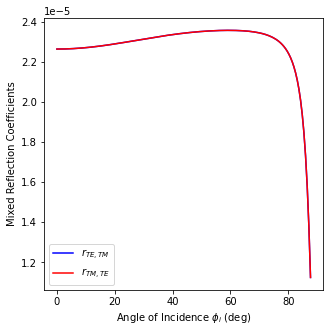

In [39]:
theta_i = np.arange(0,pi/2-(2*pi/180), 0.01)
kps = dataMu2['k1']*np.sin(theta_i)
rtmtmMU_points2 = rtmtmMU(kps, dataMu2, display=True)
rteteMU_points2 = rteteMU(kps, dataMu2, display=True)
rtmteMU_points2 = rtmteMU(kps, dataMu2, display=True)
rtetmMU_points2 = rtetmMU(kps, dataMu2, display=True)

fig, ax = plt.subplots(figsize=(5,5))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax_rtmtm, = ax.plot(theta_i*180/pi, rtetmMU_points2, color= 'blue', label=r'$r_{{TE,TM}}$') 
ax_rtete, = ax.plot(theta_i*180/pi, rtmteMU_points2, color= 'red', label=r'$r_{{TM,TE}}$')

ax.legend(handles=[ax_rtmtm, ax_rtete], prop={'size': 10})
ax.set_ylabel(r'Mixed Reflection Coefficients')
ax.set_xlabel(r'Angle of Incidence $\phi_i$ (deg)')

In [40]:
def generate_datas_thicc(thicknesses):
    datas = []
    for th in thicknesses:
        data_th = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1,"n1" : 1, "theta1" : 0, "theta2" : pi, "theta3": 0,  "w" : 1}
        data_th['w'] = data_th['c']*2*pi/(600*10**(-9))
        data_th["e2"] = TI_emu[0]
        data_th["m2"] = TI_emu[1]
        data_th["n2"] = np.sqrt(data_th["e2"]*data_th["m2"])
        data_th["e3"] = 1
        data_th["m3"] = 10**5
        data_th["n3"] = 10**(5/2)
        data_th["k1"] = data_th["n1"]*data_th["w"]/data_th["c"]
        data_th["k2"] = data_th["n2"]*data_th["w"]/data_th["c"]
        data_th["k3"] = data_th["n3"]*data_th["w"]/data_th["c"]
        data_th["delta"] = data_th["alpha"]*data_th["m1"]*data_th["m2"]*(data_th["theta1"] - data_th["theta2"])/pi
        data_th["scale"] = (data_th["w"]/(2*pi*data_th["c"]))**(-1)
        data_th["dist12"] = 0
        data_th["dist23"] = -th*(600*10**(-9))/(data_th['n2'])
        datas.append(data_th)
    return datas

def generate_datas_thicc2(thicknesses):
    datas = []
    for th in thicknesses:
        data_th = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1,"n1" : 1, "theta1" : 0, "theta2" : 0, "theta3": pi,  "w" : 1}
        data_th['w'] = data_th['c']*2*pi/(600*10**(-9))
        data_th["e3"] = TI_emu[0]
        data_th["m3"] = TI_emu[1]
        data_th["n3"] = np.sqrt(data_th["e3"]*data_th["m3"])
        data_th["e2"] = 1
        data_th["m2"] = 10**5
        data_th["n2"] = 10**(5/2)
        data_th["k1"] = data_th["n1"]*data_th["w"]/data_th["c"]
        data_th["k2"] = data_th["n2"]*data_th["w"]/data_th["c"]
        data_th["k3"] = data_th["n3"]*data_th["w"]/data_th["c"]
        data_th["delta"] = data_th["alpha"]*data_th["m1"]*data_th["m2"]*(data_th["theta1"] - data_th["theta2"])/pi
        data_th["scale"] = (data_th["w"]/(2*pi*data_th["c"]))**(-1)
        data_th["dist12"] = 0
        data_th["dist23"] = -th*(600*10**(-9))/(data_th['n2'])
        datas.append(data_th)
    return datas

In [61]:
TI_emu = (1,2)
thicknesses = np.arange(0, 3, 0.001)
thick_datas = generate_datas_thicc(thicknesses)
theta_i = 0
kps = dataMu2['k1']*np.sin(theta_i)
rtetmMu_points = rtetmMU(kps, thick_datas, display=True)
rtmteMu_points = rtmteMU(kps, thick_datas, display=True)

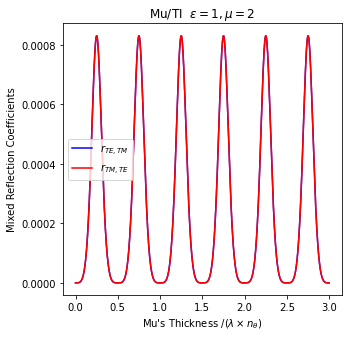

In [62]:
fig, ax = plt.subplots(figsize=(5,5))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax_rtmtm, = ax.plot(thicknesses, rtetmMu_points, color= 'blue', label=r'$r_{{TE,TM}}$') 
ax_rtete, = ax.plot(thicknesses, rtmteMu_points, color= 'red', label=r'$r_{{TM,TE}}$') 

ax.legend(handles=[ax_rtmtm, ax_rtete], prop={'size': 10})
ax.set_ylabel(r'Mixed Reflection Coefficients')
ax.set_xlabel('Mu\'s Thickness /' +r'$(\lambda\times n_\theta)$')
ax.set_title(r'Mu/TI  $\epsilon={},\mu={}$'.format(TI_emu[0],TI_emu[1]))
fig.savefig('Plots Scan/Thickness_epsilon={}_mu={}.png'.format(TI_emu[0], TI_emu[1]), bbox_inches='tight')

Text(0.5, 0, "TI's Thickness /$\\lambda$")

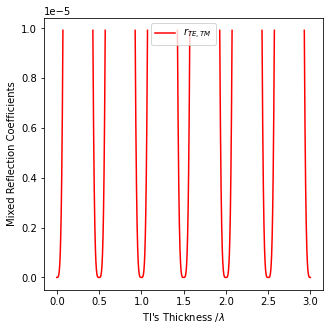

In [57]:
fig, ax = plt.subplots(figsize=(5,5))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

cut_p = 10**(-5)
mask = rtmteMu_points > cut_p
mask2 = rtmteMu_points < cut_p

masked_rtmteMu_points = np.ma.array(rtmteMu_points, mask=mask)

ax_rtmtm, = ax.plot(thicknesses, masked_rtmteMu_points, color= 'red', label=r'$r_{{TE,TM}}$') 

ax.legend(handles=[ax_rtmtm], prop={'size': 10})
ax.set_ylabel(r'Mixed Reflection Coefficients')
ax.set_xlabel('TI\'s Thickness /' +r'$\lambda$')